# Project C115

## Getting Data

In [22]:
import pandas
import numpy
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

data_frame = pandas.read_csv("https://raw.githubusercontent.com/whitehatjr/datasets/master/PRO-C115/escape_velocity.csv")

velocity = data_frame["Velocity"].to_list()
escaped = data_frame["Escaped"].to_list()

## Showing Data

In [23]:
chart = px.scatter(x=velocity, y=escaped, color=velocity, labels=dict(y="Escaped", x="Velocity", color="Velocity"))
chart.show()

## Linear Regression

In [24]:
m, c = numpy.polyfit(velocity, escaped, 1)

y = []

for x in velocity:
    value = m * x + c
    y.append(value)

figure = px.scatter(x=velocity, y=escaped, color=velocity, labels=dict(y="Escaped", x="Velocity", color="Velocity"))

figure.update_layout(shapes=[dict(type="line", x0=min(velocity), x1=max(velocity), y0=min(y), y1=max(y))])

figure.show()

## Logistic Regression

In [25]:
x = numpy.reshape(velocity, (len(velocity), 1))
y = numpy.reshape(escaped, (len(escaped), 1))

log_reg = LogisticRegression()
log_reg.fit(x, y.ravel())

def model(x):
    return 1 / (1 + numpy.exp(-x))

x_test = numpy.linspace(0, 100, 200)
escaped_chance = model(x_test * log_reg.coef_ + log_reg.intercept_).ravel()

## Graph of Logistic Regression

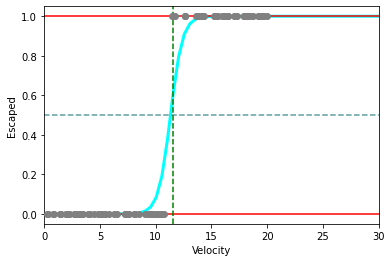

In [26]:
plt.scatter(x.ravel(), y, color="grey", zorder=20)

plt.plot(x_test, escaped_chance, color="cyan", linewidth=3)
plt.axhline(y=0, color="red", linestyle="-")
plt.axhline(y=1, color="red", linestyle="-")
plt.axhline(y=0.5, color="cadetBlue", linestyle="--")

plt.axvline(x=x_test[23], color="green", linestyle="--")

plt.xlabel("Velocity")
plt.ylabel("Escaped")
plt.xlim(0, 30)

plt.show()